# How Unhealthy is your Starbucks Drink?

**Your Starbucks fall drink may be more unhealthy than you thought**

## Introduction

In this notebook, I am analyzing Starbucks nutrition data collected from https://www.starbucks.com/menu on August 28, 2020. This data only includes items from the Starbucks Drinks menu.

## About the Data

Starbucks provides a nutrition analysis of their menu items to help you balance your Starbucks order with other foods you eat. Their goal is to provide you with the information you need to make sensible decisions about balance, variety and moderation in your diet.

The data file _sbux_nutrition.csv_ contains the drink nutrition data for this analysis. It contains the following variables:

* **drink_name**: Name of the drink
* **type**: Type of drink, categories defined by Starbucks
* **size**: Size of the drink (I have only included grande for this notebook's purpose)
* **calories**: Number of calories
* **fat**: Total fat (g)
* **cholesterol**: Cholesterol (mg)
* **sodium**: Sodium (mg)
* **carb**: Total carbohydrates (g)
* **sugar**: Sugars (g)
* **protein**: Protein (g)
* **caffeine**: Caffeine (g)

All drinks from the Starbucks online main menu (collected in Fall 2020) are included, with the exception of Clover® Brewed Coffees, Coffee Travelers, Iced Clover® Brewed Coffees, Bottled Teas, Milk, Sparkling Water, and Water. There are **11 columns** and **525 rows (drinks)**.

For the purpose of this comparison analysis, I am filtering the dataset to only include drinks in *grande* size. Therefore, each line is a unique drink with a unique drink name. I am also ommitting drinks in which grande size nutrition data was not provided on the Starbucks website menu.

## Load and Explore the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

data = pd.read_csv("sbux_nutrition.csv")
data.head()

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
0,Caffè Americano,Hot Coffees,Short,5.0,0.0,0.0,5.0,1.0,0.0,0.0,75.0
1,Caffè Americano,Hot Coffees,Tall,10.0,0.0,0.0,10.0,1.0,0.0,1.0,150.0
2,Caffè Americano,Hot Coffees,Grande,15.0,0.0,0.0,10.0,2.0,0.0,1.0,225.0
3,Caffè Americano,Hot Coffees,Venti,15.0,0.0,0.0,15.0,3.0,0.0,1.0,300.0
4,Blonde Roast,Hot Coffees,Short,5.0,0.0,0.0,5.0,0.0,0.0,0.0,180.0


In [2]:
# How many NAs?
data.isnull().sum()

drink_name     0
type           0
size           0
calories       8
fat            8
cholesterol    8
sodium         8
carb           8
sugar          8
protein        8
caffeine       8
dtype: int64

In [3]:
# Clean up
data = data.dropna()
data = data[data['size'] == 'Grande']

data['type'] = data['type'].replace({'Frappuccino® Blended Beverages':'Frappuccinos'})
data['drink_name'] = data['drink_name'].str.replace('Frappuccino® Blended Beverage', 'Frappuccino')
data['drink_name'] = data['drink_name'].str.replace('Frappuccino®', 'Frappuccino')
data.head()

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
2,Caffè Americano,Hot Coffees,Grande,15.0,0.0,0.0,10.0,2.0,0.0,1.0,225.0
6,Blonde Roast,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,360.0
10,Caffè Misto,Hot Coffees,Grande,110.0,4.0,15.0,100.0,10.0,10.0,7.0,150.0
14,Featured Starbucks® Dark Roast Coffee,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,260.0
18,Pike Place® Roast,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,310.0


In [4]:
# New number of rows/columns
data.shape

(139, 11)

Summary table of each column (nutrition value).

Some things to note from the table below:
* Calories for a grande drink on the menu can go up to 470, w/o addons
* Caffeine for a grande drink can go up to 360mg. *It is generally recommended to not go over 400mg a day.*

In [5]:
data.describe()

,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,200.575540,6.863309,19.712230,117.050360,30.035971,27.129496,4.697842,108.323741
std,141.833336,6.804412,21.717636,104.293366,19.873298,18.661296,4.692971,86.717784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,0.000000,0.000000,15.000000,14.000000,11.500000,1.000000,32.500000
50%,190.000000,4.500000,15.000000,110.000000,30.000000,26.000000,3.000000,95.000000
75%,335.000000,14.000000,45.000000,190.000000,44.000000,41.500000,8.000000,170.000000
max,470.000000,24.000000,65.000000,380.000000,77.000000,71.000000,15.000000,360.000000


What are the average nutrition values for each drink category (type)?

In [6]:
data.groupby('type').mean()

,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
type,,,,,,,,
Cold Coffees,159.500000,6.362500,18.000000,96.125000,21.025000,18.650000,4.275000,194.000000
Cold Drinks,129.411765,1.382353,0.000000,49.117647,28.352941,25.117647,0.588235,36.470588
Frappuccinos,385.714286,15.642857,45.714286,263.809524,56.428571,51.047619,5.238095,60.238095
Hot Coffees,220.200000,8.240000,22.600000,137.400000,28.440000,24.800000,8.240000,174.600000
Hot Drinks,350.000000,12.000000,40.555556,180.000000,50.222222,47.222222,10.777778,5.555556
Hot Teas,72.307692,1.500000,5.769231,38.076923,12.384615,11.846154,2.615385,37.461538
Iced Teas,114.642857,1.000000,3.928571,35.714286,24.500000,23.357143,1.785714,36.428571


What ratio of Starbucks drinks contain caffeine?

In [7]:
caf_perc = round(len(data[data.caffeine > 0]) / len(data) * 100, 2)
print('Percentage of menu drinks that contain caffeine: ', caf_perc, '%', sep='')

Percentage of menu drinks that contain caffeine: 85.61%


How many varieties of each category does Starbucks offer?

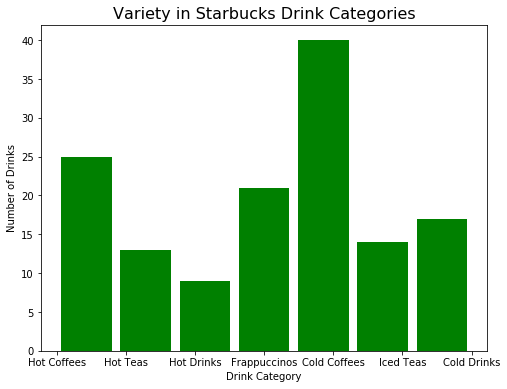

In [8]:
fig = plt.figure(figsize = (8, 6))
plt.hist(data.type, bins = 7, rwidth= 0.85, color='green')
plt.title('Variety in Starbucks Drink Categories', fontsize=16)
plt.xlabel("Drink Category")
plt.ylabel("Number of Drinks")
plt.show()

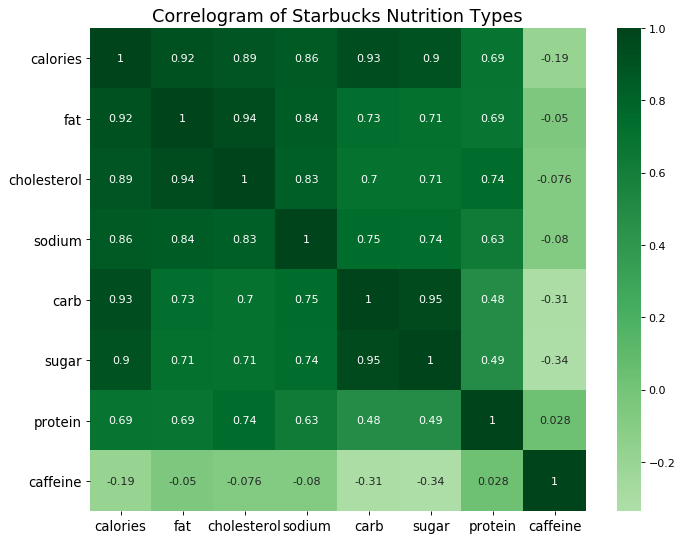

In [9]:
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='Greens', center=0, annot=True)

# Decorations
plt.title('Correlogram of Starbucks Nutrition Types', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

This correlogram shows correlations between each nutrition type in Starbucks drinks. Darker green colors encode a higher (more positive) nutrition type correlation. Every nutrition type shows a positive correlation with each other with the exception of *caffiene* - caffeine has a slight negative correlation or close to zero correlation with the other nutrition types. The strongest positive correlation is between *fat* and *cholesterol*, which makes sense because *cholesterol* is one of many types of lipids. Similarly, *carbohydrates* and *sugar* have the second strongest correlation as sugar is a carbohydrate. 

Other very strong positive relationships include: calories\~carbohydrates, calories\~fat, calories\~cholesterol, and calories\~sugar. While these correlations don't point out any unique observations in Starbucks nutrition, it's good to verify that the correlations make sense overall.

## Analyzing Drink Nutrition

### Focus: Calories, Sugar, & Caffeine

Why are we looking mostly at calories and sugar?

According to [NPD’s Health Aspirations and Behavioral Tracking Service](https://www.npd.com/wps/portal/npd/us/news/press-releases/2020/new-year-new-nutrition-facts-label-on-food-most-us-consumers-read-the-nutrition-facts-label-and-the-top-items-they-look-for-are-sugars-and-calories/), the top two items consumers look for on the labels are sugars and calories. I also want to discuss caffeine as it is in over *85%* of items on the drink menu, and it is a [hot topic](https://www.health.harvard.edu/staying-healthy/the-buzz-about-caffeine-and-health) in today's nutrition and health discussions.

### Calories
* Which drinks have the most calories?
* What is the distribution of calories among Starbucks drinks?

In [10]:
data.nlargest(10, 'calories')

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
98,Salted Caramel Mocha,Hot Coffees,Grande,470.0,16.0,50.0,370.0,68.0,59.0,13.0,175.0
213,Mocha Cookie Crumble Frappuccino,Frappuccinos,Grande,470.0,23.0,55.0,260.0,63.0,57.0,6.0,95.0
216,Caramel Ribbon Crunch Frappuccino,Frappuccinos,Grande,470.0,20.0,65.0,280.0,66.0,62.0,5.0,85.0
166,Salted Caramel Hot Chocolate,Hot Drinks,Grande,460.0,16.0,50.0,350.0,66.0,59.0,13.0,25.0
246,Chocolate Cookie Crumble Crème Frappuccino,Frappuccinos,Grande,450.0,24.0,60.0,290.0,54.0,48.0,7.0,15.0
386,Iced Salted Caramel Mocha,Cold Coffees,Grande,450.0,18.0,55.0,320.0,64.0,55.0,9.0,175.0
176,White Hot Chocolate,Hot Drinks,Grande,440.0,19.0,55.0,260.0,55.0,55.0,15.0,0.0
234,Java Chip Frappuccino,Frappuccinos,Grande,440.0,18.0,45.0,260.0,65.0,60.0,6.0,105.0
110,White Chocolate Mocha,Hot Coffees,Grande,430.0,18.0,55.0,250.0,55.0,53.0,14.0,150.0
207,Pumpkin Spice Coffee Frappuccino,Frappuccinos,Grande,420.0,14.0,45.0,280.0,67.0,66.0,6.0,100.0


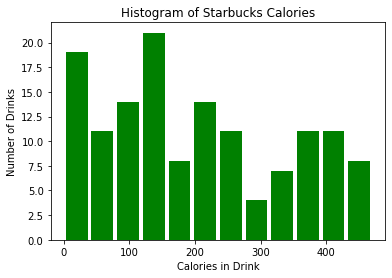

In [11]:
fig = plt.figure(figsize = (6, 4))
plt.hist(data.calories, bins = 12, rwidth= 0.85, color='green')
plt.title('Histogram of Starbucks Calories')
plt.xlabel("Calories in Drink")
plt.ylabel("Number of Drinks")
plt.show()

### Sugar
* Which drinks have the most sugar?
* What is the distribution of sugar among Starbucks drinks?

In [12]:
data.nlargest(10, 'sugar')

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
181,Caramel Apple Spice,Hot Drinks,Grande,380.0,8.0,25.0,30.0,77.0,71.0,1.0,0.0
207,Pumpkin Spice Coffee Frappuccino,Frappuccinos,Grande,420.0,14.0,45.0,280.0,67.0,66.0,6.0,100.0
210,Salted Caramel Mocha Coffee Frappuccino,Frappuccinos,Grande,420.0,15.0,45.0,360.0,67.0,63.0,5.0,100.0
216,Caramel Ribbon Crunch Frappuccino,Frappuccinos,Grande,470.0,20.0,65.0,280.0,66.0,62.0,5.0,85.0
237,White Chocolate Mocha Frappuccino,Frappuccinos,Grande,410.0,16.0,45.0,260.0,63.0,62.0,5.0,95.0
261,Matcha Green Tea Crème Frappuccino,Frappuccinos,Grande,410.0,15.0,50.0,240.0,63.0,62.0,6.0,70.0
234,Java Chip Frappuccino,Frappuccinos,Grande,440.0,18.0,45.0,260.0,65.0,60.0,6.0,105.0
98,Salted Caramel Mocha,Hot Coffees,Grande,470.0,16.0,50.0,370.0,68.0,59.0,13.0,175.0
166,Salted Caramel Hot Chocolate,Hot Drinks,Grande,460.0,16.0,50.0,350.0,66.0,59.0,13.0,25.0
213,Mocha Cookie Crumble Frappuccino,Frappuccinos,Grande,470.0,23.0,55.0,260.0,63.0,57.0,6.0,95.0


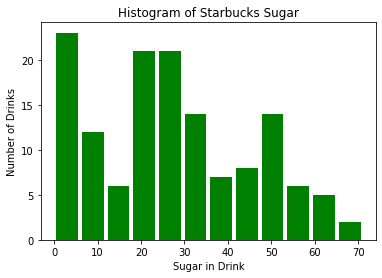

In [13]:
fig = plt.figure(figsize = (6, 4))
plt.hist(data.sugar, bins = 12, rwidth= 0.85, color='green')
plt.title('Histogram of Starbucks Sugar')
plt.xlabel("Sugar in Drink")
plt.ylabel("Number of Drinks")
plt.show()

### Caffeine
* Which drinks have the most caffeine?
* What is the distribution of caffeine among Starbucks drinks?

In [14]:
data.nlargest(10, 'caffeine')

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,sugar,protein,caffeine
6,Blonde Roast,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,360.0
18,Pike Place® Roast,Hot Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,1.0,310.0
309,Nitro Cold Brew with Dark Cocoa Almondmilk Foam,Cold Coffees,Grande,40.0,1.5,0.0,35.0,6.0,4.0,1.0,280.0
313,Starbucks Reserve® Nitro Cold Brew,Cold Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,0.0,280.0
317,Nitro Cold Brew,Cold Coffees,Grande,5.0,0.0,0.0,10.0,0.0,0.0,0.0,280.0
307,Nitro Cold Brew with Cinnamon Almondmilk Foam,Cold Coffees,Grande,40.0,1.0,0.0,35.0,7.0,6.0,1.0,275.0
311,Nitro Cold Brew with Cinnamon Oatmilk Foam,Cold Coffees,Grande,50.0,1.5,0.0,30.0,7.0,6.0,1.0,275.0
315,Salted Caramel Cream Nitro Cold Brew,Cold Coffees,Grande,230.0,14.0,45.0,330.0,23.0,23.0,2.0,270.0
305,Pumpkin Cream Nitro Cold Brew,Cold Coffees,Grande,250.0,12.0,40.0,55.0,31.0,31.0,3.0,265.0
319,Nitro Cold Brew with Sweet Cream,Cold Coffees,Grande,70.0,5.0,15.0,20.0,4.0,4.0,1.0,265.0


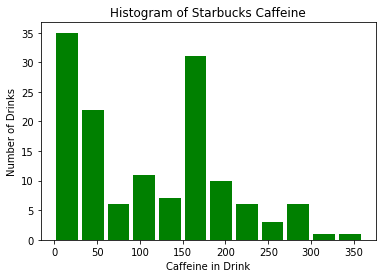

In [15]:
fig = plt.figure(figsize = (6, 4))
plt.hist(data.caffeine, bins = 12, rwidth= 0.85, color='green')
plt.title('Histogram of Starbucks Caffeine')
plt.xlabel("Caffeine in Drink")
plt.ylabel("Number of Drinks")
plt.show()

### Analyzing Drink Categories

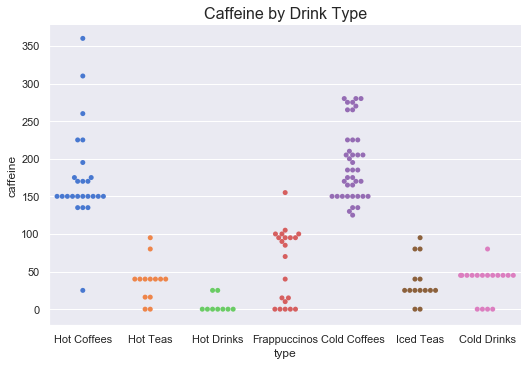

In [16]:
sns.set(palette="muted")
sns.catplot(x="type", y="caffeine", hue="type",
            kind="swarm", data=data, aspect=1.5);
plt.title("Caffeine by Drink Type", fontsize=16)
plt.show()

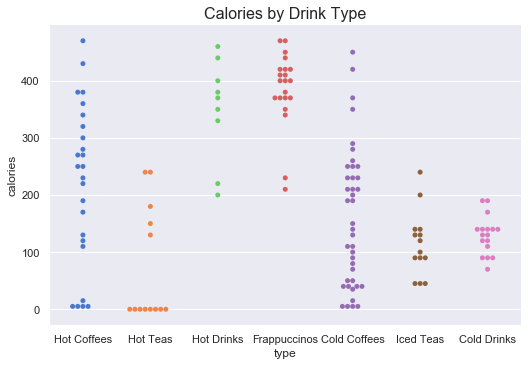

In [17]:
sns.catplot(x="type", y="calories",
            kind="swarm", data=data, aspect=1.5);
plt.title("Calories by Drink Type", fontsize=16)
plt.show()

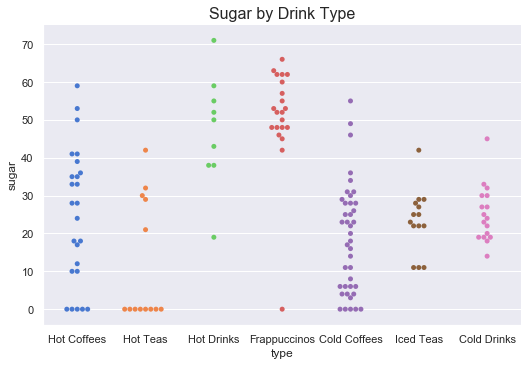

In [18]:
sns.catplot(x="type", y="sugar",
            kind="swarm", data=data, aspect=1.5);
plt.title("Sugar by Drink Type", fontsize=16)
plt.show()

Caffeine is most apparent in *Hot Coffee* and *Cold Coffee*, with most points falling at or above 150mg.

The *Frappuccino* category easily identified as the category with the most calories and sugar. The majority of points for this category fall above 350 calories and 40g of sugar.

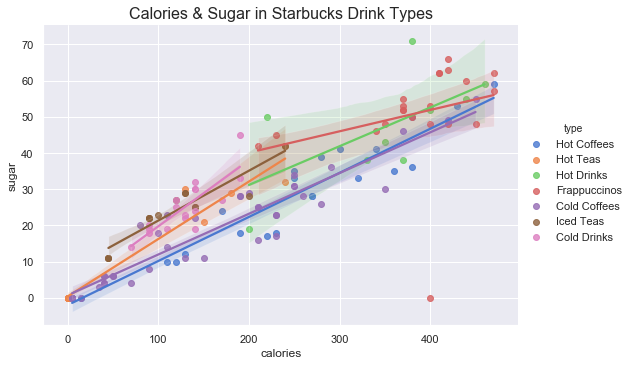

In [19]:
sns.lmplot(x="calories", y="sugar", hue="type",
           data=data, aspect=1.5);
plt.title("Calories & Sugar in Starbucks Drink Types", fontsize=16)
plt.show()

We can use the categorical linear regressions above to compare calories to sugar in Starbucks drinks. For every drink category, we can see that as # of calories increases, sugar increases. Using color to show the relationships by drink category, we can see that data points in the Frappuccino category tend to be placed higher in calories and sugar, relative to the other categories. Data points in the Hot Tea category tend to be in the lower ranges of calories and sugar. Finally, the Hot Coffee and Cold Coffee categories have a very wide distribution in this plot. This shows that the drink's nutrition in these categories are not dependent on the category, but instead on other variables that make up the drink.

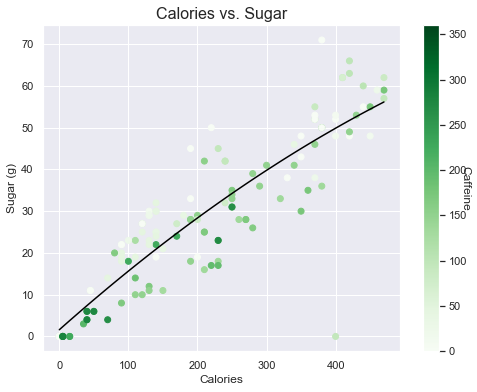

In [31]:
fig = plt.figure(figsize = (8, 6))
plt.scatter(data.calories, data.sugar, c=data.caffeine, cmap='Greens')
cbar = plt.colorbar()
cbar.set_label('Caffeine', rotation=270)

# draw line
plt.plot(np.unique(data.calories), np.poly1d(np.polyfit(data.calories, data.sugar, 2))
         (np.unique(data.calories)), color = 'black')

plt.title('Calories vs. Sugar', fontsize=16)
plt.xlabel("Calories")
plt.ylabel("Sugar (g)")
plt.show()

## Daily Values

Looking at g/mg values for all of the nutrition types doesn't tell us much because we cannot compare the amounts of each nutrition type with different scales. To standardize this, I want to know how the nutrition values for each type compare to the daily suggested intake.

_As Specified by the FDA Based on a 2,000 Calorie Intake for Adults and Children 4 or More Years of Age._

* Calories: 2000
* Fat: 78g
* Cholesterol: 300mg
* Sodium: 2300mg
* Carbohydrates: 275g
* Sugar: ?? &rarr; "There is no Daily Value for total sugars because no recommendation has been made for the total amount to eat in a day." - [(FDA)](https://www.fda.gov/food/new-nutrition-facts-label/added-sugars-new-nutrition-facts-label#:~:text=The%20Dietary%20Guidelines%20for%20Americans,of%20added%20sugars%20per%20day.)
* Protein: 50g

Source: https://www.fda.gov/media/135301/download (updated March 2020)

For healthy adults, it is generally recommended to not go over 400mg a day, an amount not associated with negative affects - [(FDA)](https://www.fda.gov/consumers/consumer-updates/caffeine-and-kids-fda-takes-closer-look#:~:text=Q.%20What%20is%20currently%20considered,associated%20with%20dangerous%2C%20negative%20effects.)
* Caffeine: 400mg



After this transformation, I want to see how the nutrition types compare to each other now. What is the average daily intake percentage of each nutrition type for Starbucks drink items?

In [21]:
dv = data.copy(deep=True)
dv.calories = dv.calories / 2000 * 100
dv.fat = dv.fat / 78 * 100
dv.cholesterol = dv.cholesterol / 300 * 100
dv.sodium = dv.sodium / 2300 * 100
dv.carb = dv.carb / 275 * 100
dv = dv.drop(columns=['sugar']) # no daily level for total sugars
dv.protein = dv.protein / 50 * 100
dv.caffeine = dv.caffeine / 400 * 100

In [22]:
dv.head()

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,protein,caffeine
2,Caffè Americano,Hot Coffees,Grande,0.75,0.000000,0.0,0.434783,0.727273,2.0,56.25
6,Blonde Roast,Hot Coffees,Grande,0.25,0.000000,0.0,0.434783,0.000000,2.0,90.00
10,Caffè Misto,Hot Coffees,Grande,5.50,5.128205,5.0,4.347826,3.636364,14.0,37.50
14,Featured Starbucks® Dark Roast Coffee,Hot Coffees,Grande,0.25,0.000000,0.0,0.434783,0.000000,2.0,65.00
18,Pike Place® Roast,Hot Coffees,Grande,0.25,0.000000,0.0,0.434783,0.000000,2.0,77.50


In [23]:
# Average daily intake percentage
dv.mean()

calories       10.028777
fat             8.799115
cholesterol     6.570743
sodium          5.089146
carb           10.922171
protein         9.395683
caffeine       27.080935
dtype: float64

In [24]:
# Max daily intake percentage
dv.max()[3:]

calories          23.5
fat            30.7692
cholesterol    21.6667
sodium         16.5217
carb                28
protein             30
caffeine            90
dtype: object

No drinks seem to go above 1/3 of recommended daily value for any nutrition type, with the exception of caffeine. Let's be happy that no grande drinks have a nutrition value intake equivalent to one of our 3 daily meals!

In [25]:
# Highest daily intake % of caffeine
dv.nlargest(10, 'caffeine')[['drink_name', 'caffeine']]

,drink_name,caffeine
6,Blonde Roast,90.00
18,Pike Place® Roast,77.50
309,Nitro Cold Brew with Dark Cocoa Almondmilk Foam,70.00
313,Starbucks Reserve® Nitro Cold Brew,70.00
317,Nitro Cold Brew,70.00
307,Nitro Cold Brew with Cinnamon Almondmilk Foam,68.75
311,Nitro Cold Brew with Cinnamon Oatmilk Foam,68.75
315,Salted Caramel Cream Nitro Cold Brew,67.50
305,Pumpkin Cream Nitro Cold Brew,66.25
319,Nitro Cold Brew with Sweet Cream,66.25


Blonde Roast takes the #1 spot, taking up **90%** of the recommended caffeine daily intake! You best not be planning on another coffee later in the day. Unsurprisingly, we find many forms of Nitro Cold Brew in the top 10 most caffeinated drinks.

In [26]:
# Highest daily intake % of calories
dv.nlargest(10, 'calories')[['drink_name', 'calories']]

,drink_name,calories
98,Salted Caramel Mocha,23.5
213,Mocha Cookie Crumble Frappuccino,23.5
216,Caramel Ribbon Crunch Frappuccino,23.5
166,Salted Caramel Hot Chocolate,23.0
246,Chocolate Cookie Crumble Crème Frappuccino,22.5
386,Iced Salted Caramel Mocha,22.5
176,White Hot Chocolate,22.0
234,Java Chip Frappuccino,22.0
110,White Chocolate Mocha,21.5
207,Pumpkin Spice Coffee Frappuccino,21.0


In [27]:
dv[dv.carb > 25]

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,protein,caffeine
181,Caramel Apple Spice,Hot Drinks,Grande,19.0,10.25641,8.333333,1.304348,28.0,2.0,0.0


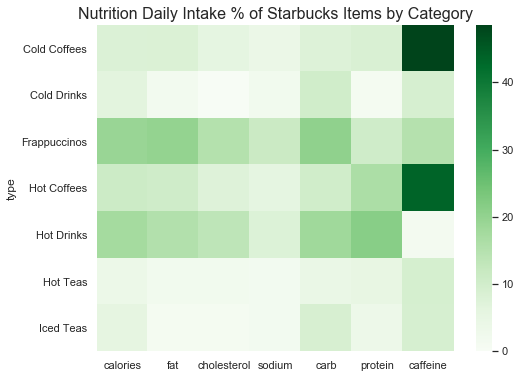

In [41]:
heatmap = dv.groupby('type').mean()

plt.figure(figsize=(8,6))
plt.title('Nutrition Daily Intake % of Starbucks Items by Category', fontsize=16)
sns.heatmap(heatmap, cmap="Greens")

A high level of caffeine intake is apparent in this heatmap for the categories Cold Coffee and Hot Coffee. This further supports the observations that caffeine is most apparent in the variant Nitro Cold Brew drinks (Cold Coffee) and the variant "roast" drinks (Hot Coffee).

On a positive note, it is very good to see little darkness in the other nutrition types. With the other nutrition types, we need to worry about how they add up when we start concerning our daily meal intake as well. Having a lighter value is good so that we can save the bulk of our calorie intake for the meals that fuel us. On the other hand, we don't have to worry about caffeine intake for the rest of the day... *unless* you are someone who has multiple cups of coffee a day. 

## And the most unhealthy drinks are...

With caffeine greater than 65% DV, and with calories and carbohydrates greater than 20% DV, here are your worst drinks!

In terms of caffeine...

In [29]:
dv[(dv['caffeine'] > 60 )].sort_values(by=['caffeine'], ascending=False)

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,protein,caffeine
6,Blonde Roast,Hot Coffees,Grande,0.25,0.000000,0.000000,0.434783,0.000000,2.0,90.00
18,Pike Place® Roast,Hot Coffees,Grande,0.25,0.000000,0.000000,0.434783,0.000000,2.0,77.50
309,Nitro Cold Brew with Dark Cocoa Almondmilk Foam,Cold Coffees,Grande,2.00,1.923077,0.000000,1.521739,2.181818,2.0,70.00
313,Starbucks Reserve® Nitro Cold Brew,Cold Coffees,Grande,0.25,0.000000,0.000000,0.434783,0.000000,0.0,70.00
317,Nitro Cold Brew,Cold Coffees,Grande,0.25,0.000000,0.000000,0.434783,0.000000,0.0,70.00
307,Nitro Cold Brew with Cinnamon Almondmilk Foam,Cold Coffees,Grande,2.00,1.282051,0.000000,1.521739,2.545455,2.0,68.75
311,Nitro Cold Brew with Cinnamon Oatmilk Foam,Cold Coffees,Grande,2.50,1.923077,0.000000,1.304348,2.545455,2.0,68.75
315,Salted Caramel Cream Nitro Cold Brew,Cold Coffees,Grande,11.50,17.948718,15.000000,14.347826,8.363636,4.0,67.50
305,Pumpkin Cream Nitro Cold Brew,Cold Coffees,Grande,12.50,15.384615,13.333333,2.391304,11.272727,6.0,66.25
319,Nitro Cold Brew with Sweet Cream,Cold Coffees,Grande,3.50,6.410256,5.000000,0.869565,1.454545,2.0,66.25


In terms of calories and carbs...

In [30]:
dv[(dv['calories'] >= 20) & (dv['carb'] > 20)].sort_values(by=['calories', 'carb'], ascending=False)

,drink_name,type,size,calories,fat,cholesterol,sodium,carb,protein,caffeine
98,Salted Caramel Mocha,Hot Coffees,Grande,23.5,20.512821,16.666667,16.086957,24.727273,26.0,43.75
216,Caramel Ribbon Crunch Frappuccino,Frappuccinos,Grande,23.5,25.641026,21.666667,12.173913,24.000000,10.0,21.25
213,Mocha Cookie Crumble Frappuccino,Frappuccinos,Grande,23.5,29.487179,18.333333,11.304348,22.909091,12.0,23.75
166,Salted Caramel Hot Chocolate,Hot Drinks,Grande,23.0,20.512821,16.666667,15.217391,24.000000,26.0,6.25
386,Iced Salted Caramel Mocha,Cold Coffees,Grande,22.5,23.076923,18.333333,13.913043,23.272727,18.0,43.75
234,Java Chip Frappuccino,Frappuccinos,Grande,22.0,23.076923,15.000000,11.304348,23.636364,12.0,26.25
207,Pumpkin Spice Coffee Frappuccino,Frappuccinos,Grande,21.0,17.948718,15.000000,12.173913,24.363636,12.0,25.00
210,Salted Caramel Mocha Coffee Frappuccino,Frappuccinos,Grande,21.0,19.230769,15.000000,15.652174,24.363636,10.0,25.00
237,White Chocolate Mocha Frappuccino,Frappuccinos,Grande,20.5,20.512821,15.000000,11.304348,22.909091,10.0,23.75
261,Matcha Green Tea Crème Frappuccino,Frappuccinos,Grande,20.5,19.230769,16.666667,10.434783,22.909091,12.0,17.50


Very unfortunate that one of my absolute favorites is the Salted Caramel Mocha.